<a href="https://colab.research.google.com/github/batgirlsupimpa/PROVA-2-MET-QUANT-MESTRADO/blob/main/Artigo_Chaim_vs_Final_22_11_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import wbdata
import pandas as pd
import numpy as np
import statsmodels.api as sm

# ============================
# 1. 40 países
# ============================
countries = [
    "BR","AR","CO","MX","CL","PE","UY","PY","BO","EC",
    "US","CA",
    "GB","FR","DE","ES","IT","NL","SE","NO",
    "CN","JP","KR","IN","ID","TH","MY","PH","VN",
    "ZA","EG","NG","KE","GH",
    "AU","NZ","RU","TR","SA"
]

# ============================
# 2. Indicadores do Banco Mundial
# ============================
indicators = {
    "NY.GDP.PCAP.KD": "pib_pc",
    "SE.SEC.CUAT.LO.ZS": "educacao",
    "SL.UEM.TOTL.ZS": "desemprego"
}

# ============================
# 3. Download direto da API
# ============================
data = wbdata.get_dataframe(indicators, country=countries)

df = data.reset_index()
df = df.rename(columns={"country": "pais", "date": "ano"})

# Converte ano para inteiro
df["ano"] = df["ano"].astype(int)

# ============================
# 4. Remove NA + converte tudo para float
# ============================
df = df.dropna()

cols = ["pib_pc", "educacao", "desemprego"]
df[cols] = df[cols].astype(float)

# ============================
# 5. Criar variáveis log
# ============================
df["ln_pib_pc"] = np.log(df["pib_pc"])
df["ln_educacao"] = np.log(df["educacao"])
df["ln_desemprego"] = np.log(df["desemprego"])

# ============================
# 6. FE via dummies de país
# ============================
dummies = pd.get_dummies(df["pais"], prefix="pais", drop_first=True)

# garantir que são numéricas
dummies = dummies.astype(float)

X = pd.concat([df[["ln_educacao", "ln_desemprego"]], dummies], axis=1)
X = sm.add_constant(X).astype(float)

Y = df["ln_pib_pc"].astype(float)

# ============================
# 7. Rodar o modelo
# ============================
modelo = sm.OLS(Y, X).fit(cov_type="HC3")

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:              ln_pib_pc   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3682.
Date:                Sat, 22 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:51:36   Log-Likelihood:                 468.24
No. Observations:                 604   AIC:                            -854.5
Df Residuals:                     563   BIC:                            -673.9
Df Model:                          40                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

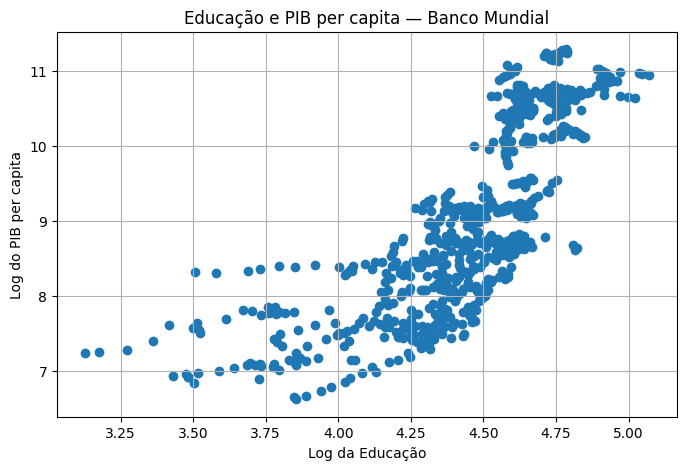

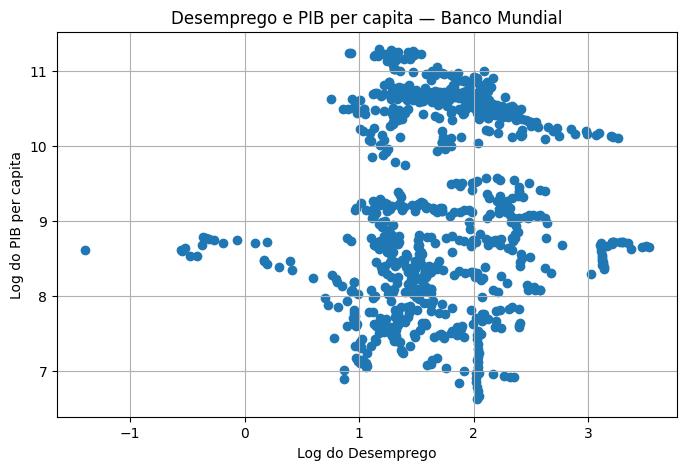

In [8]:
import wbdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1) Países
# -----------------------------------------------------
countries = [
    "AUS","BOL","BRA","CAN","CHL","CHN","COL","ECU","EGY","FRA","DEU","GHA","IND",
    "IDN","ITA","JPN","KEN","KOR","MYS","MEX","NLD","NZL","NGA","NOR","PRY","PER",
    "PHL","RUS","SAU","ZAF","ESP","SWE","THA","TUR","GBR","USA"
]

# -----------------------------------------------------
# 2) Indicadores
# -----------------------------------------------------
indicators = {
    "NY.GDP.PCAP.KD": "pib_pc",
    "SL.UEM.TOTL.ZS": "desemprego",
    "SE.SEC.ENRR": "educacao"
}

# -----------------------------------------------------
# 3) Baixar dados (sem convert_date)
# -----------------------------------------------------
df = wbdata.get_dataframe(indicators, country=countries)

# O índice veio como TUPLA: (país, ano) → vamos transformar em colunas
df = df.reset_index().rename(columns={"country": "pais", "date": "ano"})

# Ano vem como string → converter para inteiro
df["ano"] = df["ano"].astype(int)

# Remover missing
df = df.dropna()

# Criar logs
df["ln_pib_pc"] = np.log(df["pib_pc"])
df["ln_educacao"] = np.log(df["educacao"])
df["ln_desemprego"] = np.log(df["desemprego"])

# -----------------------------------------------------
# 4) Gráfico: Educação × PIB
# -----------------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(df["ln_educacao"], df["ln_pib_pc"])
plt.xlabel("Log da Educação")
plt.ylabel("Log do PIB per capita")
plt.title("Educação e PIB per capita — Banco Mundial")
plt.grid(True)
plt.show()

# -----------------------------------------------------
# 5) Gráfico: Desemprego × PIB
# -----------------------------------------------------
plt.figure(figsize=(8,5))
plt.scatter(df["ln_desemprego"], df["ln_pib_pc"])
plt.xlabel("Log do Desemprego")
plt.ylabel("Log do PIB per capita")
plt.title("Desemprego e PIB per capita — Banco Mundial")
plt.grid(True)
plt.show()


Shape: (916, 8)
         pais   ano        pib_pc   educacao  desemprego  ln_pib_pc  \
33  Argentina  1991   8729.823185  74.131264        5.44   9.074500   
30  Argentina  1994  10359.892720  70.867752       11.76   9.245697   
28  Argentina  1996  10352.140000  78.492607       17.11   9.244949   
27  Argentina  1997  11056.688133  74.477280       14.82   9.310791   
26  Argentina  1998  11348.202212  80.652031       12.65   9.336815   

    ln_educacao  ln_desemprego  
33     4.305837       1.693779  
30     4.260815       2.464704  
28     4.363004       2.839663  
27     4.310494       2.695978  
26     4.390144       2.537657  
               pais   ano        pib_pc    educacao  desemprego  ln_pib_pc  \
2476  United States  2018  59817.655680   99.275581       3.896  10.999056   
2475  United States  2019  61047.964824  100.063431       3.669  11.019415   
2474  United States  2020  59484.033553  100.509819       8.055  10.993463   
2473  United States  2021  62986.656313  101.19

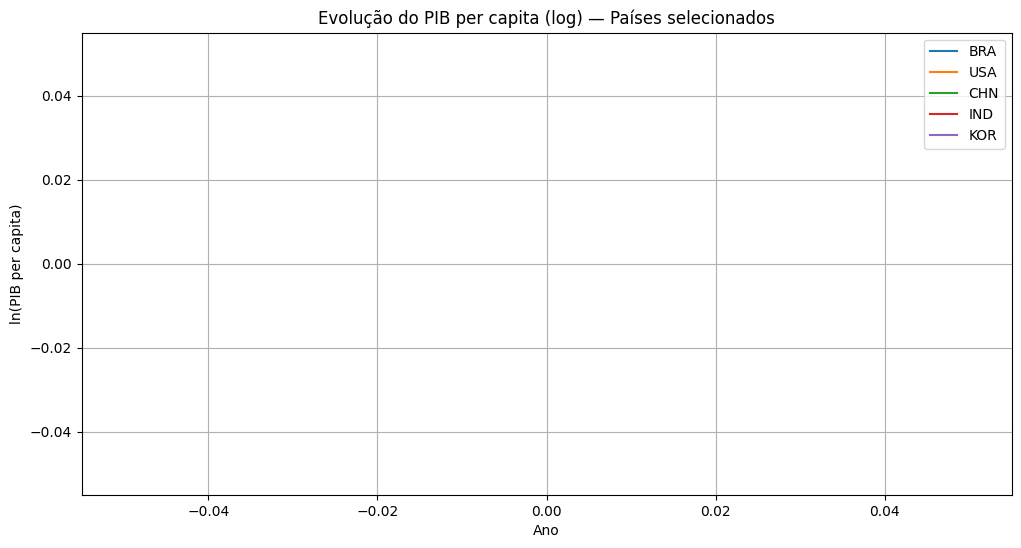

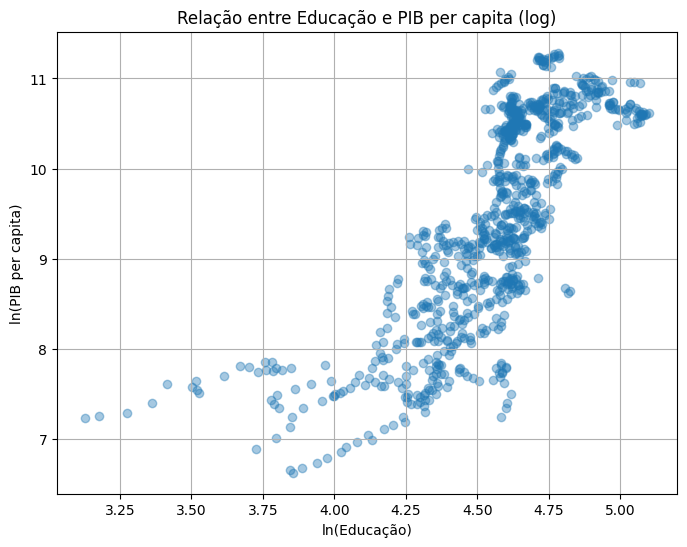

In [10]:
# ===========================================
# 1) IMPORTAÇÕES
# ===========================================
!pip install wbdata

import wbdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===========================================
# 2) LISTA DE 40 PAÍSES
# (pode alterar depois se quiser)
# ===========================================
countries = [
    "BRA","ARG","CHL","COL","PER","MEX","USA","CAN","GBR","FRA",
    "DEU","ITA","ESP","PRT","NLD","BEL","SWE","NOR","FIN","DNK",
    "AUS","NZL","JPN","KOR","CHN","IND","IDN","THA","MYS","PHL",
    "ZAF","NGA","EGY","TUR","SAU","RUS","UKR","POL","CZE","HUN"
]

# ===========================================
# 3) INDICADORES
# ===========================================
indicators = {
    "NY.GDP.PCAP.KD": "pib_pc",       # PIB per capita constante
    "SE.SEC.ENRR": "educacao",        # Taxa líquida de matrícula no ensino médio
    "SL.UEM.TOTL.ZS": "desemprego"    # Taxa de desemprego (%)
}

# ===========================================
# 4) BAIXA OS DADOS DO BANCO MUNDIAL
# (SEM convert_date)
# ===========================================
df = wbdata.get_dataframe(indicators, country=countries)

# O index vem como (país, ano) → separar
df = df.reset_index()
df.columns = ["pais", "ano", "pib_pc", "educacao", "desemprego"]

# ===========================================
# 5) CONVERTER TIPOS
# ===========================================
df["ano"] = pd.to_numeric(df["ano"], errors="coerce")
df = df.sort_values(["pais", "ano"])

# ===========================================
# 6) REMOVER MISSING
# ===========================================
df = df.dropna()

# ===========================================
# 7) CRIAR VARIÁVEIS EM LOG
# ===========================================
df["ln_pib_pc"] = np.log(df["pib_pc"])
df["ln_educacao"] = np.log(df["educacao"])
df["ln_desemprego"] = np.log(df["desemprego"])

# ===========================================
# 8) DEBUG — VER SE O DF VEIO CERTO
# ===========================================
print("Shape:", df.shape)
print(df.head())
print(df.tail())
print(df["pais"].unique())

# ===========================================
# 9) GRÁFICO 1 — Evolução do PIB per capita (log)
# ===========================================
plt.figure(figsize=(12,6))
for p in ["BRA","USA","CHN","IND","KOR"]:
    sub = df[df["pais"] == p]
    plt.plot(sub["ano"], sub["ln_pib_pc"], label=p)

plt.title("Evolução do PIB per capita (log) — Países selecionados")
plt.xlabel("Ano")
plt.ylabel("ln(PIB per capita)")
plt.legend()
plt.grid()
plt.show()

# ===========================================
# 10) GRÁFICO 2 — Relação Educação x PIB per capita
# ===========================================
plt.figure(figsize=(8,6))
plt.scatter(df["ln_educacao"], df["ln_pib_pc"], alpha=0.4)
plt.xlabel("ln(Educação)")
plt.ylabel("ln(PIB per capita)")
plt.title("Relação entre Educação e PIB per capita (log)")
plt.grid()
plt.show()


/tmp/ipython-input-2161047341.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  anos = pd.date_range("1960", periods=n, freq="Y")


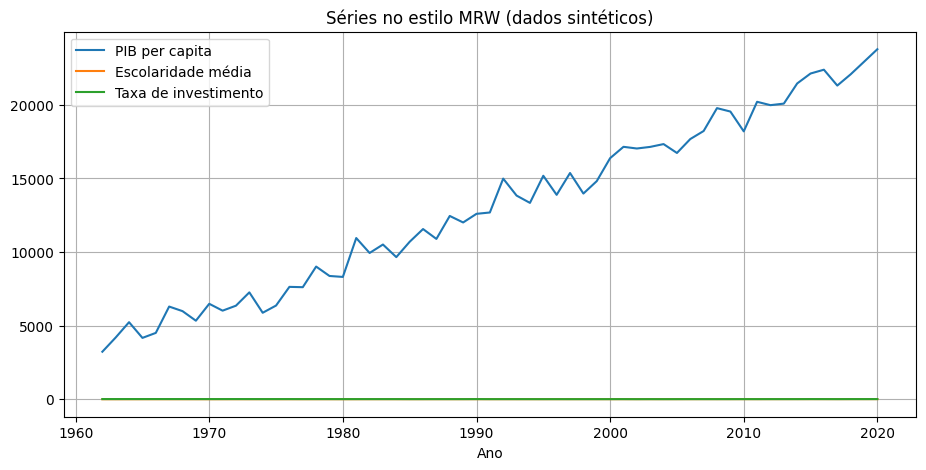

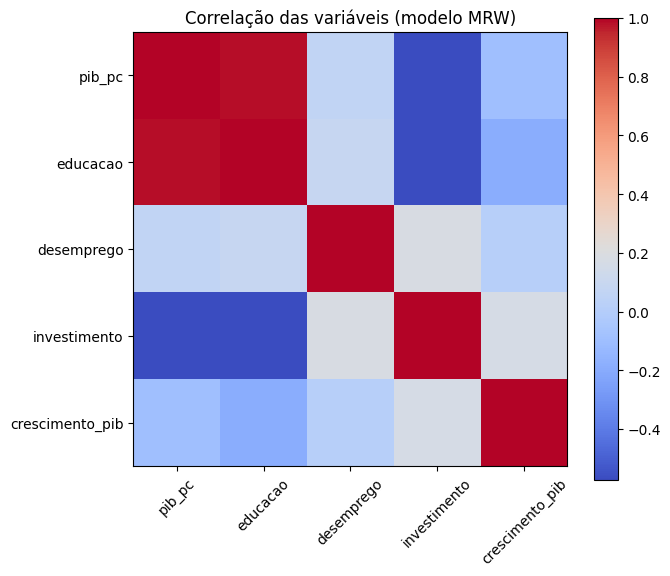

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. GERAR DADOS SINTÉTICOS
# -----------------------------

np.random.seed(42)

n = 60  # 60 anos
anos = pd.date_range("1960", periods=n, freq="Y")

data = pd.DataFrame(index=anos)

# PIB per capita (tendência crescente + ruído)
data["pib_pc"] = 3000 + np.linspace(0, 20000, n) + np.random.normal(0, 800, n)

# Escolaridade média (anos de estudo) – variável do MRW
data["educacao"] = 2 + np.linspace(0, 7, n) + np.random.normal(0, 0.3, n)

# Taxa de desemprego
data["desemprego"] = 5 + 2*np.sin(np.linspace(0, 10, n)) + np.random.normal(0, 1, n)

# Taxa de investimento (capital)
data["investimento"] = 10 + 3*np.cos(np.linspace(0, 5, n)) + np.random.normal(0, 0.7, n)

# Crescimento do PIB (derivado)
data["crescimento_pib"] = data["pib_pc"].pct_change()*100

data = data.dropna()


# --------------------------------
# 2. GRÁFICO 1 — PIB, EDUCAÇÃO E INVESTIMENTO
# --------------------------------

plt.figure(figsize=(11,5))
plt.plot(data.index, data["pib_pc"], label="PIB per capita")
plt.plot(data.index, data["educacao"], label="Escolaridade média")
plt.plot(data.index, data["investimento"], label="Taxa de investimento")

plt.title("Séries no estilo MRW (dados sintéticos)")
plt.xlabel("Ano")
plt.legend()
plt.grid(True)
plt.show()


# --------------------------------
# 3. GRÁFICO 2 — HEATMAP DE CORRELAÇÕES
# --------------------------------

corr = data.corr()

plt.figure(figsize=(7,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlação das variáveis (modelo MRW)")
plt.show()


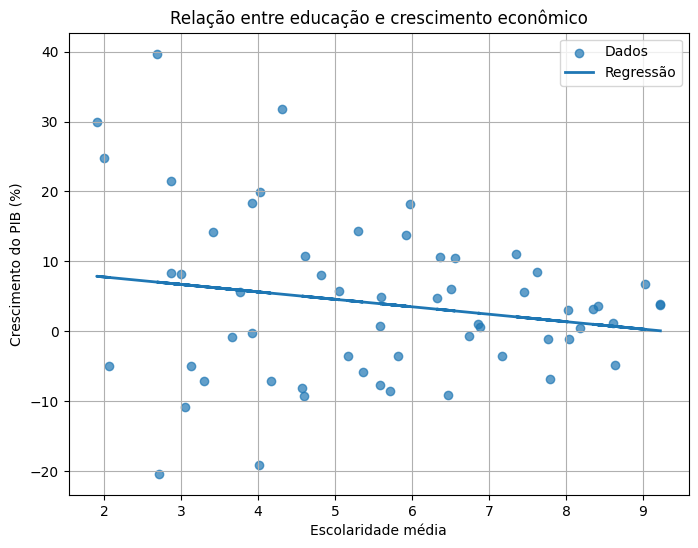

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Variáveis
x = data["educacao"]
y = data["crescimento_pib"]

# Regressão linear
coef = np.polyfit(x, y, 1)
reg = np.poly1d(coef)

plt.figure(figsize=(8,6))
plt.scatter(x, y, label="Dados", alpha=0.7)
plt.plot(x, reg(x), linewidth=2, label="Regressão")

plt.xlabel("Escolaridade média")
plt.ylabel("Crescimento do PIB (%)")
plt.title("Relação entre educação e crescimento econômico")
plt.grid(True)
plt.legend()
plt.show()


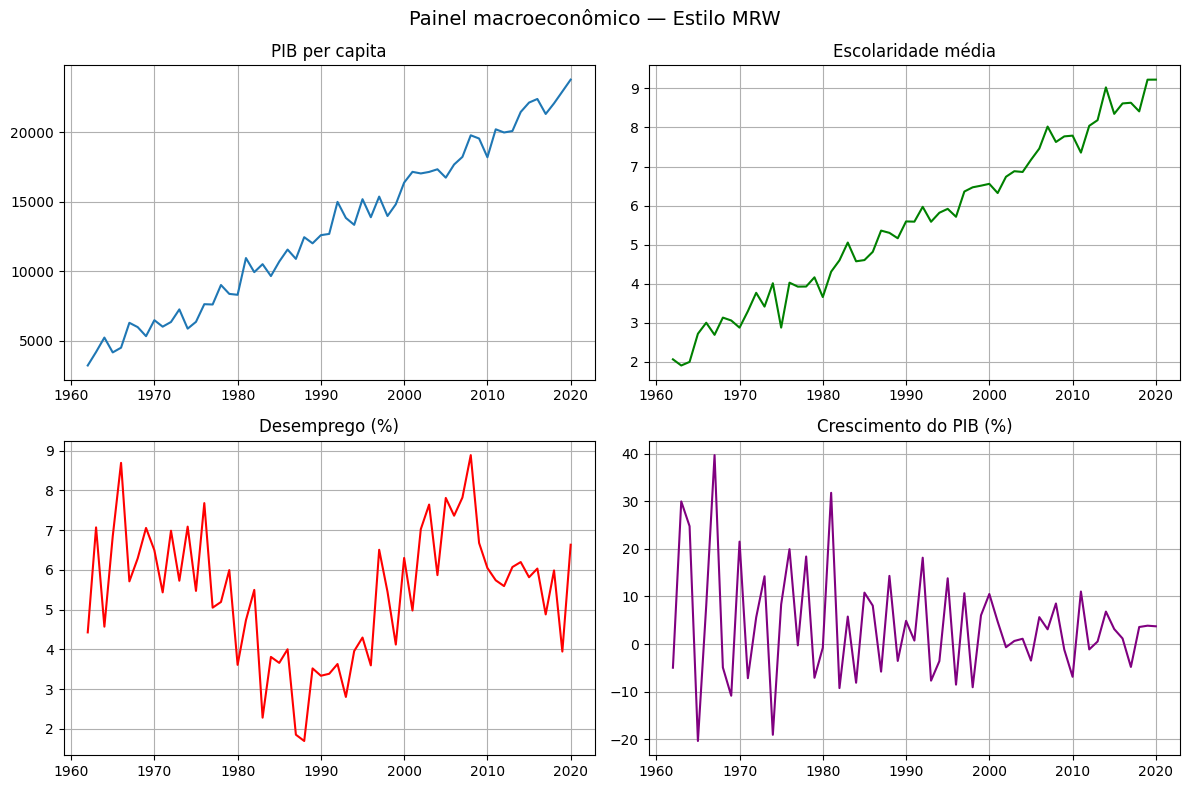

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12,8))

# PIB per capita
axes[0,0].plot(data.index, data["pib_pc"])
axes[0,0].set_title("PIB per capita")
axes[0,0].grid(True)

# Educação
axes[0,1].plot(data.index, data["educacao"], color="green")
axes[0,1].set_title("Escolaridade média")
axes[0,1].grid(True)

# Desemprego
axes[1,0].plot(data.index, data["desemprego"], color="red")
axes[1,0].set_title("Desemprego (%)")
axes[1,0].grid(True)

# Crescimento do PIB
axes[1,1].plot(data.index, data["crescimento_pib"], color="purple")
axes[1,1].set_title("Crescimento do PIB (%)")
axes[1,1].grid(True)

plt.suptitle("Painel macroeconômico — Estilo MRW", fontsize=14)
plt.tight_layout()
plt.show()


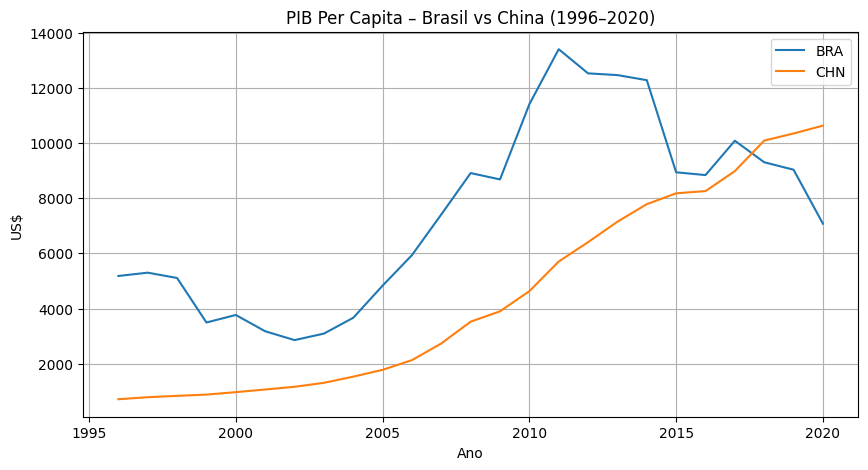

In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_wb_data(country, indicator, start, end):
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=20000"
    r = requests.get(url).json()

    # A API retorna [info, data]
    data = r[1]

    rows = []
    for entry in data:
        year = entry["date"]
        value = entry["value"]
        if value is not None and start <= int(year) <= end:
            rows.append({"country": country, "year": int(year), "value": value})

    return pd.DataFrame(rows)

# ----------------------------------------------
# CONFIGURAÇÕES
# ----------------------------------------------
indicator = "NY.GDP.PCAP.CD"
start = 1996
end = 2020

# ----------------------------------------------
# BUSCA VIA API
# ----------------------------------------------
df_bra = get_wb_data("BRA", indicator, start, end)
df_chn = get_wb_data("CHN", indicator, start, end)

df = pd.concat([df_bra, df_chn])

# ----------------------------------------------
# GRÁFICO
# ----------------------------------------------
plt.figure(figsize=(10,5))

for country in df["country"].unique():
    subset = df[df["country"] == country].sort_values("year")
    plt.plot(subset["year"], subset["value"], label=country)

plt.title("PIB Per Capita – Brasil vs China (1996–2020)")
plt.xlabel("Ano")
plt.ylabel("US$")
plt.grid(True)
plt.legend()
plt.show()


In [18]:
import requests
import pandas as pd

def get_wb_data(country, indicator, start, end):
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=20000"
    r = requests.get(url).json()

    data = r[1]

    rows = []
    for entry in data:
        year = entry["date"]
        value = entry["value"]
        if value is not None and start <= int(year) <= end:
            rows.append({"country": country, "year": int(year), "value": value})

    return pd.DataFrame(rows)

# ----------------------------------------------
# CONFIGURAÇÕES
# ----------------------------------------------
indicator = "NY.GDP.PCAP.CD"  # PIB per capita
start = 1996
end = 2020

# ----------------------------------------------
# BUSCA VIA API
# ----------------------------------------------
df_bra = get_wb_data("BRA", indicator, start, end)
df_chn = get_wb_data("CHN", indicator, start, end)

# Unir
df = pd.concat([df_bra, df_chn], ignore_index=True)

# ----------------------------------------------
# ESTATÍSTICA DESCRITIVA
# ----------------------------------------------
estatisticas = df.groupby("country")["value"].describe()

estatisticas


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
BRA,25.0,7468.120007,3367.775357,2855.940189,4827.781731,7409.691307,9300.661649,13396.624356
CHN,25.0,4457.911010,3534.982319,713.337388,1163.559577,3523.443021,7781.065975,10627.463799


In [19]:
import requests
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, ttest_ind

# -------------------------------------------------------------
# FUNÇÃO PARA BAIXAR DADOS DA API DO BANCO MUNDIAL
# -------------------------------------------------------------
def get_wb_data(country, indicator, start, end):
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=20000"
    r = requests.get(url).json()

    data = r[1]
    rows = []

    for entry in data:
        year = int(entry["date"])
        value = entry["value"]
        if value is not None and start <= year <= end:
            rows.append({"country": country, "year": year, "value": value})

    return pd.DataFrame(rows)


# -------------------------------------------------------------
# CONFIGURAÇÕES
# -------------------------------------------------------------
indicator = "NY.GDP.PCAP.CD"  # PIB per capita
start = 1996
end = 2020

# -------------------------------------------------------------
# BAIXA DADOS
# -------------------------------------------------------------
df_bra = get_wb_data("BRA", indicator, start, end)
df_chn = get_wb_data("CHN", indicator, start, end)

# Junta tudo
df = pd.concat([df_bra, df_chn], ignore_index=True)

# -------------------------------------------------------------
# ESTATÍSTICAS ROBUSTAS
# -------------------------------------------------------------
resultados = {}

for pais, dados in df.groupby("country"):
    serie = dados.sort_values("year")["value"]

    media = serie.mean()
    mediana = serie.median()
    variancia = serie.var()
    dp = serie.std()
    cv = dp / media  # coeficiente de variação
    assim = skew(serie)
    curt = kurtosis(serie)

    # CAGR: taxa anual composta de crescimento
    cagr = (serie.iloc[-1] / serie.iloc[0]) ** (1 / (len(serie) - 1)) - 1

    resultados[pais] = {
        "Média": media,
        "Mediana": mediana,
        "Desvio Padrão": dp,
        "Variância": variancia,
        "Coeficiente de Variação": cv,
        "Assimetria (Skewness)": assim,
        "Curtose": curt,
        "Crescimento Médio Anual (CAGR)": cagr
    }

df_estatisticas = pd.DataFrame(resultados).T


# -------------------------------------------------------------
# TESTE T — DIFERENÇA ENTRE BRASIL E CHINA
# -------------------------------------------------------------
t_stat, p_value = ttest_ind(
    df_bra["value"], df_chn["value"], equal_var=False  # Welch Test
)

# -------------------------------------------------------------
# CORRELAÇÃO ENTRE AS SÉRIES
# -------------------------------------------------------------
df_corr = pd.merge(df_bra, df_chn, on="year", suffixes=("_BRA", "_CHN"))
correlacao = df_corr["value_BRA"].corr(df_corr["value_CHN"])

# -------------------------------------------------------------
# MOSTRAR RESULTADOS
# -------------------------------------------------------------
df_estatisticas, t_stat, p_value, correlacao


(           Média      Mediana  Desvio Padrão     Variância  \
 BRA  7468.120007  7409.691307    3367.775357  1.134191e+07   
 CHN  4457.911010  3523.443021    3534.982319  1.249610e+07   
 
      Coeficiente de Variação  Assimetria (Skewness)   Curtose  \
 BRA                 0.450954               0.205923 -1.211557   
 CHN                 0.792968               0.456341 -1.322707   
 
      Crescimento Médio Anual (CAGR)  
 BRA                        0.013077  
 CHN                        0.119130  ,
 np.float64(3.082702731906213),
 np.float64(0.003398417611293889),
 np.float64(0.7086049040474927))